In [ ]:
World Happiness report analysis
Source of data: https://worldhappiness.report/
World Happiness report 2020
World Happiness Report 2023
The World Happiness Report is an annual publication that assesses and ranks countries based on their levels of happiness and well-being. It is produced by the United Nations Sustainable Development Solutions Network (SDSN) and is published by the United Nations on the International Day of Happiness, which falls on March 20th each year. The report primarily uses data from the Gallup World Poll.
Research questions:
Are people happier in 2023 compared to 2020 according to the World Happiness Report?
What has the greatest impact on the size of the Ladder score?

In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df23 = pd.read_csv(r"C:\Users\Grazina\Desktop\dok\Big query\Happiness\Data23.csv")
df20 = pd.read_csv(r"C:\Users\Grazina\Desktop\dok\Big query\Happiness\Data20.csv")

df23.columns =df23.columns.str.replace(' ', '_')
df20.columns =df20.columns.str.replace(' ', '_')
#check both dataset. Is there are empty cells?
df23.info()
#df23.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country_name                                137 non-null    object 
 1   Regional_indicator                          133 non-null    object 
 2   Year                                        137 non-null    int64  
 3   Ladder_score                                137 non-null    float64
 4   Standard_error_of_ladder_score              137 non-null    float64
 5   upperwhisker                                137 non-null    float64
 6   lowerwhisker                                137 non-null    float64
 7   Logged_GDP_per_capita                       137 non-null    float64
 8   Social_support                              137 non-null    float64
 9   Healthy_life_expectancy                     136 non-null    float64
 10  Freedom_to_mak

In [63]:
#what are the indexes of column "Regional_indicator" with empty cells?
df23_with_null =df23 [df23.isnull().any(axis=1)]
df23_with_null

,Country_name,Regional_indicator,Year,Ladder_score,Standard_error_of_ladder_score,upperwhisker,lowerwhisker,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,...,Generosity,Perceptions_of_corruption,Ladder_score_in_Dystopia,Explained_by:_Log_GDP_per_capita,Explained_by:_Social_support,Explained_by:_Healthy_life_expectancy,Explained_by:_Freedom_to_make_life_choices,Explained_by:_Generosity,Explained_by:_Perceptions_of_corruption,Dystopia_+_residual
17,Czechia,NaN,2023,6.845,0.044,6.931,6.759,10.611,0.953,69.050,...,0.040,0.859,1.778,1.823,1.544,0.477,0.693,0.158,0.050,2.099
86,North Macedonia,NaN,2023,5.254,0.055,5.361,5.146,9.703,0.805,66.500,...,0.131,0.902,1.778,1.498,1.171,0.408,0.515,0.207,0.020,1.435
98,State of Palestine,NaN,2023,4.908,0.092,5.089,4.727,8.716,0.859,NaN,...,-0.132,0.836,1.778,1.144,1.309,NaN,0.416,0.065,0.067,NaN
105,Turkiye,NaN,2023,4.614,0.083,4.777,4.450,10.307,0.796,68.663,...,-0.077,0.795,1.778,1.714,1.148,0.467,0.125,0.095,0.096,0.969


In [64]:
# add value in to  empty cells Regional_indicator
df23.loc[17,"Regional_indicator"]="Central and Eastern Europe"
df23.loc[86,"Regional_indicator"]="Central and Eastern Europe"
df23.loc[98,"Regional_indicator"]="Middle East and North Africa"
df23.loc[105,"Regional_indicator"]="Middle East and North Africa"
df23.info()
print(df23.shape)
#df23.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 21 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country_name                                137 non-null    object 
 1   Regional_indicator                          137 non-null    object 
 2   Year                                        137 non-null    int64  
 3   Ladder_score                                137 non-null    float64
 4   Standard_error_of_ladder_score              137 non-null    float64
 5   upperwhisker                                137 non-null    float64
 6   lowerwhisker                                137 non-null    float64
 7   Logged_GDP_per_capita                       137 non-null    float64
 8   Social_support                              137 non-null    float64
 9   Healthy_life_expectancy                     136 non-null    float64
 10  Freedom_to_mak

Percentage_grow 1.22 %


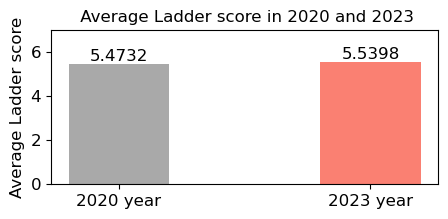

In [138]:
from statistics import mean
#calculating average by year
plt.rcParams['font.size'] = 12
avg20=round(mean(df20['Ladder_score']),4)
avg23=round(mean(df23['Ladder_score']),4)
plt.figure(figsize=(5,2))
plt.ylabel('Average Ladder score')
labels = ['2020 year', '2023 year']
plt.title (" Average Ladder score in 2020 and 2023",fontsize=12)
plt.ylim(0,7) 
values = (avg20, avg23)

plt.bar(labels, values, color=['darkgray', 'salmon'], width=0.4  )
for i, value in enumerate(values):
    plt.text(i, value, f'{value}', ha='center', va='bottom')
percentage_grow= round(((avg23/ avg20-1)*100),2)
print("Percentage_grow", percentage_grow, "%")

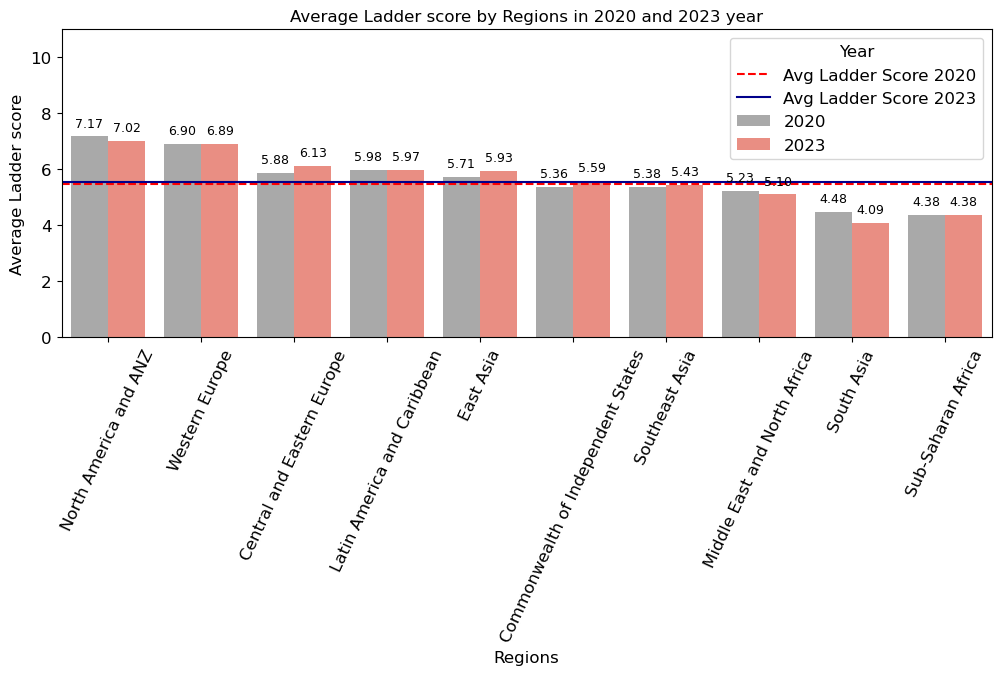

In [139]:

totaldf= pd.pandas.concat([df20,df23])
# Calculate the average values of 'Ladder_score'  by 'Regional_indicator' and 'Year'
avg_data = totaldf.groupby(['Regional_indicator', 'Year'])[['Ladder_score' ]].mean().reset_index()
avg_data.sort_values(by='Ladder_score', ascending=False, inplace=True)

plt.figure(figsize=(12, 4))
colors = sns.color_palette(['darkgray', 'salmon'])

ax = sns.barplot(data=avg_data, x='Regional_indicator', y='Ladder_score', hue='Year', palette=colors, dodge=True)
plt.axhline(avg20, color='red', linestyle='--', label=f'Avg Ladder Score 2020')
plt.axhline(avg23, color='darkblue', linestyle='-', label=f'Avg Ladder Score 2023')
plt.ylim(0,11) 
plt.xlabel("Regions")
plt.ylabel("Average Ladder score")
plt.title("Average Ladder score by Regions in 2020 and 2023 year",fontsize=12)
plt.legend(title='Year', loc='upper right') 
plt.xticks(rotation=65)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')
plt.show()

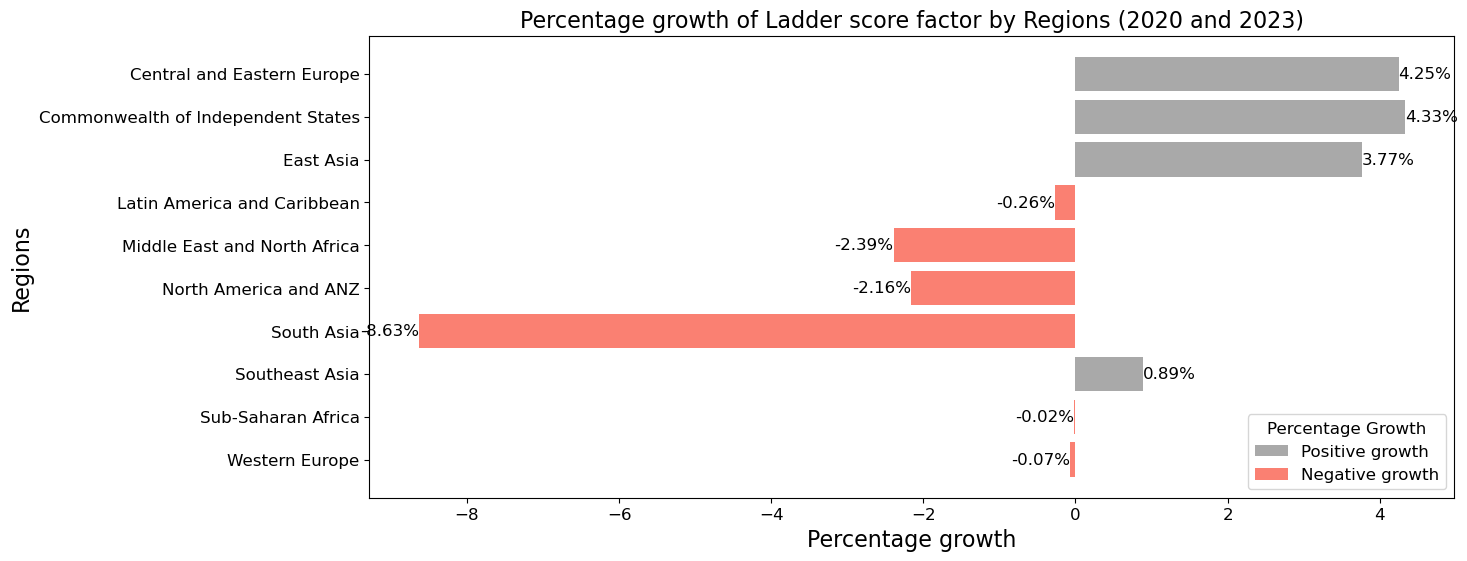

In [72]:
#percentage different calculation
avg_tot = totaldf.groupby(['Regional_indicator', 'Year'])['Ladder_score'].mean().unstack().reset_index()
percentage_grow = (((avg_tot[2023] / avg_tot[2020]) - 1) * 100)

percentage_grow_df = pd.DataFrame({'Regional_indicator': avg_tot['Regional_indicator'], 'Year2020': avg_tot[2020], 'Year2023': avg_tot[2023], 'Percentage_growth': percentage_grow})
plt.figure(figsize=(14, 6))
colors = ['salmon' if x < 0 else 'darkgray' for x in percentage_grow_df['Percentage_growth']]
bars=plt.barh(percentage_grow_df['Regional_indicator'], percentage_grow_df['Percentage_growth'], color=colors)
plt.xlabel('Percentage growth', fontsize=16)
plt.ylabel("Regions", fontsize=16)
plt.title('Percentage growth of Ladder score factor by Regions (2020 and 2023)', fontsize=16)
plt.gca().invert_yaxis()  
for i, value in enumerate(percentage_grow_df['Percentage_growth']):
    plt.text(value, i, f'{value:.2f}%', ha='left'  if value >= 0 else 'right', va='center', fontsize=12)  

positive_patch = plt.bar(0, 0, color='darkgray', label='Positive growth') 
negative_patch = plt.bar(0, 0, color='salmon', label='Negative growth')
plt.legend(title='Percentage Growth', loc='lower right')
plt.show()

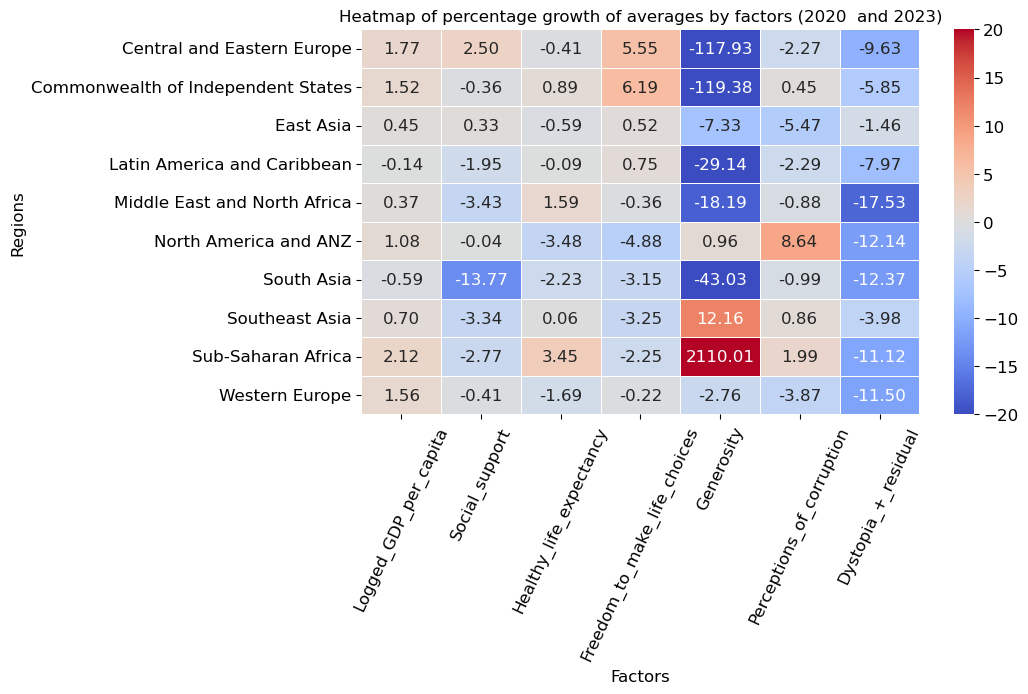

In [140]:
#calculation of percentage grow 2023/2020 by factors in regions
avg_tot_GDP = totaldf.groupby(['Regional_indicator','Year'])['Logged_GDP_per_capita'].mean().unstack().reset_index()
percentage_grow_GDP = (((avg_tot_GDP[2023] / avg_tot_GDP[2020]) - 1) * 100)
avg_tot_soc = totaldf.groupby(['Regional_indicator','Year'])['Social_support'].mean().unstack().reset_index()
percentage_grow_soc = (((avg_tot_soc[2023] / avg_tot_soc[2020]) - 1) * 100)
avg_tot_health = totaldf.groupby(['Regional_indicator','Year'])['Healthy_life_expectancy'].mean().unstack().reset_index()
percentage_grow_health = (((avg_tot_health[2023] / avg_tot_health[2020]) - 1) * 100)

avg_tot_fr = totaldf.groupby(['Regional_indicator','Year'])['Freedom_to_make_life_choices'].mean().unstack().reset_index()
percentage_grow_fr = (((avg_tot_fr[2023] / avg_tot_fr[2020]) - 1) * 100)
avg_tot_gen = totaldf.groupby(['Regional_indicator','Year'])['Generosity'].mean().unstack().reset_index()
percentage_grow_gen = (((avg_tot_gen[2023] / avg_tot_gen[2020]) - 1) * 100)
avg_tot_corr = totaldf.groupby(['Regional_indicator','Year'])['Perceptions_of_corruption'].mean().unstack().reset_index()
percentage_grow_corr = (((avg_tot_corr[2023] / avg_tot_corr[2020]) - 1) * 100)
avg_tot_dys = totaldf.groupby(['Regional_indicator','Year'])['Dystopia_+_residual'].mean().unstack().reset_index()
percentage_grow_dys = (((avg_tot_dys[2023] / avg_tot_dys[2020]) - 1) * 100)
percentage_grow_df1 = pd.DataFrame({'Regional_indicator': avg_tot['Regional_indicator'],  'Logged_GDP_per_capita': percentage_grow_GDP, 'Social_support':percentage_grow_soc , 'Healthy_life_expectancy': percentage_grow_health, 'Freedom_to_make_life_choices':percentage_grow_fr, 'Generosity':percentage_grow_gen,'Perceptions_of_corruption':percentage_grow_corr, 'Dystopia_+_residual':percentage_grow_dys})
percentage_grow_df1.set_index('Regional_indicator', inplace=True)
plt.figure(figsize=(9, 5))
vmin = -20 
vmax = 20 
sns.heatmap(percentage_grow_df1, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.5,vmin=vmin, vmax=vmax)
plt.xlabel('Factors')
plt.ylabel("Regions")
plt.title('Heatmap of percentage growth of averages by factors (2020  and 2023)',fontsize=12)
plt.xticks(rotation=65)
plt.show()

In [142]:
#create dataframe of South Asia countries 
South_Asia_df= totaldf.loc[totaldf.Regional_indicator =='South Asia']
South_Asia_df1 = South_Asia_df.rename(columns = {'Dystopia_+_residual':'Dystopia_and_residual'})
South_Asia_df1 = South_Asia_df1.groupby(['Country_name','Year'])['Ladder_score', 'Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption', 'Dystopia_and_residual'].mean().unstack().reset_index()

#percentage growth calculation by factors (2023/2020) in South Asia countries
Ladder_score_growth = ((South_Asia_df1.Ladder_score[2023]/South_Asia_df1.Ladder_score[2020]) - 1) * 100
Logged_GDP_per_capita_growth = ((South_Asia_df1.Logged_GDP_per_capita[2023]/South_Asia_df1.Logged_GDP_per_capita[2020]) - 1) * 100
Social_support_growth = ((South_Asia_df1.Social_support[2023]/South_Asia_df1.Social_support[2020]) - 1) * 100
Healthy_life_expectancy_growth = ((South_Asia_df1.Healthy_life_expectancy[2023]/South_Asia_df1.Healthy_life_expectancy[2020]) - 1) * 100
Freedom_to_make_life_choices_growth = ((South_Asia_df1.Freedom_to_make_life_choices[2023]/South_Asia_df1.Freedom_to_make_life_choices[2020]) - 1) * 100
Generosity_growth = ((South_Asia_df1.Generosity[2023]/South_Asia_df1.Generosity[2020]) - 1) * 100
Perceptions_of_corruption_growth = ((South_Asia_df1.Perceptions_of_corruption[2023]/South_Asia_df1.Perceptions_of_corruption[2020]) - 1) * 100
Dystopia_and_residual_growth = ((South_Asia_df1.Dystopia_and_residual[2023]/South_Asia_df1.Dystopia_and_residual[2020]) - 1) * 100

percentage_grow_SouthAsia = pd.DataFrame({'Country_name': South_Asia_df1['Country_name'],'Ladder_score': Ladder_score_growth, 'Logged_GDP_per_capita':Logged_GDP_per_capita_growth, 'Social_support':Social_support_growth, 'Healthy_life_expectancy': Healthy_life_expectancy_growth, 'Freedom_to_make_life_choices': Freedom_to_make_life_choices_growth, 'Generosity':Generosity_growth,'Perceptions_of_corruption':Perceptions_of_corruption_growth, 'Dystopia_and_residual': Dystopia_and_residual_growth})
percentage_grow_SouthAsia

C:\Users\Grazina\AppData\Local\Temp\ipykernel_13412\1727146118.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  South_Asia_df1 = South_Asia_df1.groupby(['Country_name','Year'])['Ladder_score', 'Logged_GDP_per_capita', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity', 'Perceptions_of_corruption', 'Dystopia_and_residual'].mean().unstack().reset_index()


,Country_name,Ladder_score,Logged_GDP_per_capita,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perceptions_of_corruption,Dystopia_and_residual
0,Afghanistan,-27.578013,-1.860688,-27.503411,4.034987,-3.674735,-16.000722,-9.284331,-35.245693
1,Bangladesh,-11.397118,4.801899,-20.848895,0.069660,-6.176265,-114.852341,5.462992,-22.461713
2,India,12.948818,-1.026280,2.667855,0.933009,1.764731,25.105108,0.253523,33.354972
3,Maldives,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Nepal,4.336995,4.171959,-4.775538,-3.029482,1.308352,-5.298626,6.083308,8.569015
5,Pakistan,-19.993674,0.675171,-12.780020,-1.613880,4.241270,-82.182576,5.537652,-35.939571
6,Sri Lanka,2.657727,1.075937,0.075836,-0.074502,-6.044846,-136.977864,-5.937328,2.243041


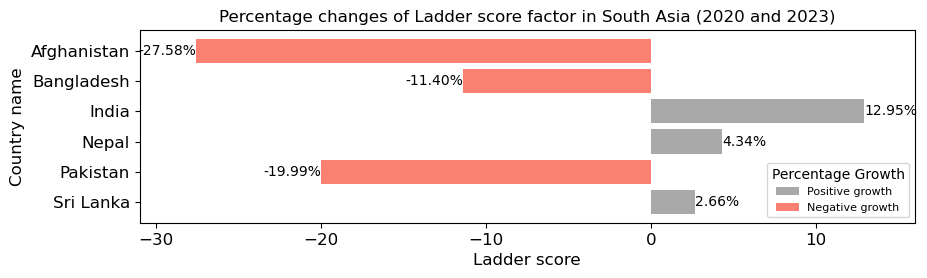

In [143]:

plt.figure(figsize=(10, 2.5))
percentage_grow_SouthAsia =percentage_grow_SouthAsia.drop(3) #remove Maldyves - no data 
colors = ['salmon' if x < 0 else 'darkgray' for x in percentage_grow_SouthAsia['Ladder_score']]
plt.xlim(-31,16)
bars=plt.barh(percentage_grow_SouthAsia['Country_name'], percentage_grow_SouthAsia['Ladder_score'], color=colors)
plt.xlabel('Ladder score')
plt.ylabel("Country name")
plt.title('Percentage changes of Ladder score factor in South Asia (2020 and 2023)', fontsize=12)
plt.gca().invert_yaxis()  # Invert the y-axis to show the highest growth at the top
for i, value in enumerate(percentage_grow_SouthAsia['Ladder_score']):
    plt.text(value, i, f'{value:.2f}%', ha='left'  if value >= 0 else 'right', va='center', fontsize=10)
   #va vertical alignment, i-index

# Create a legend for the color mapping   
positive_patch = plt.bar(0, 0, color='darkgray', label='Positive growth') # 0-begining of bar
negative_patch = plt.bar(0, 0, color='salmon', label='Negative growth')

plt.legend(title='Percentage Growth', loc='lower right',fontsize=8,title_fontsize='small')
plt.show()

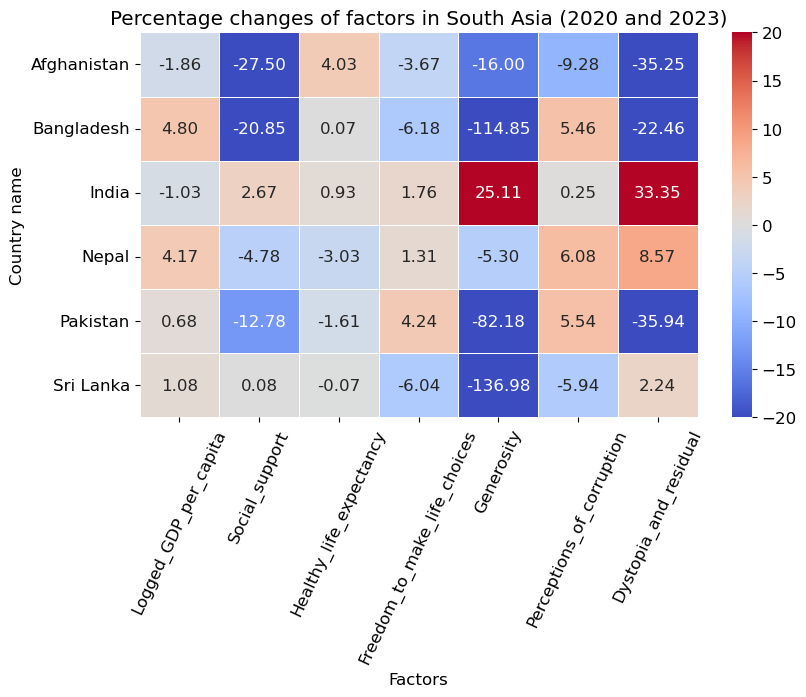

In [86]:
#percentage grow hearmap of all factors of South Asia

plt.figure(figsize=(9, 5))
vmin = -20 
vmax = 20 
percentage_grow_SouthAsia = percentage_grow_SouthAsia.drop(columns=['Ladder_score'])
sns.heatmap(percentage_grow_SouthAsia.set_index('Country_name'), cmap='coolwarm', fmt=".2f", linewidths=0.5, annot=True,vmin=vmin, vmax=vmax )
plt.title('Percentage changes of factors in South Asia (2020 and 2023)')
plt.xlabel('Factors')
plt.ylabel("Country name")
plt.xticks(rotation=65)
plt.show()

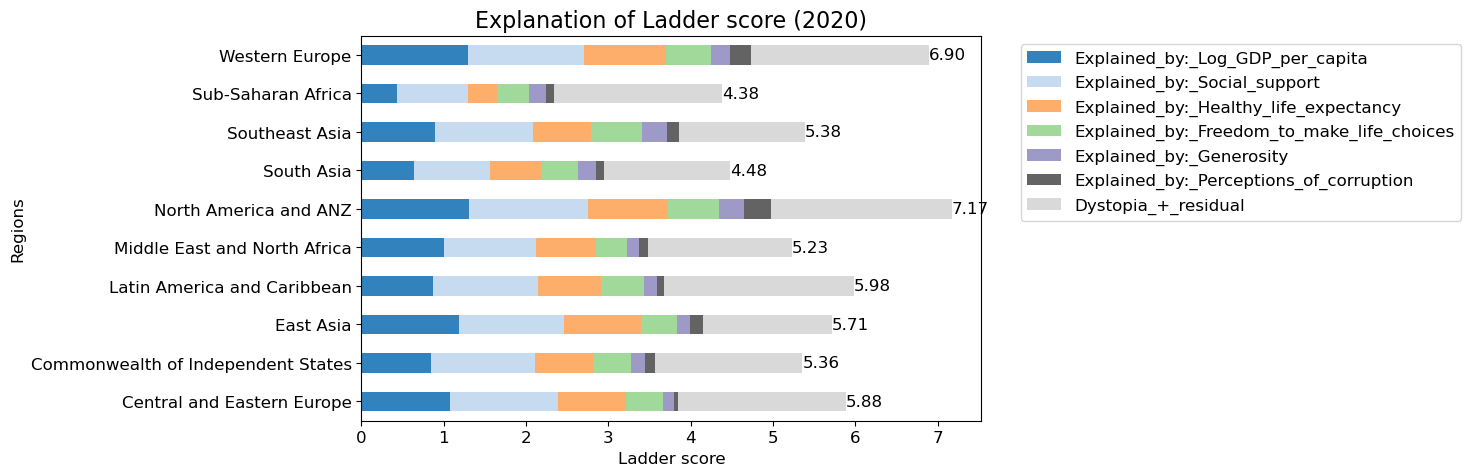

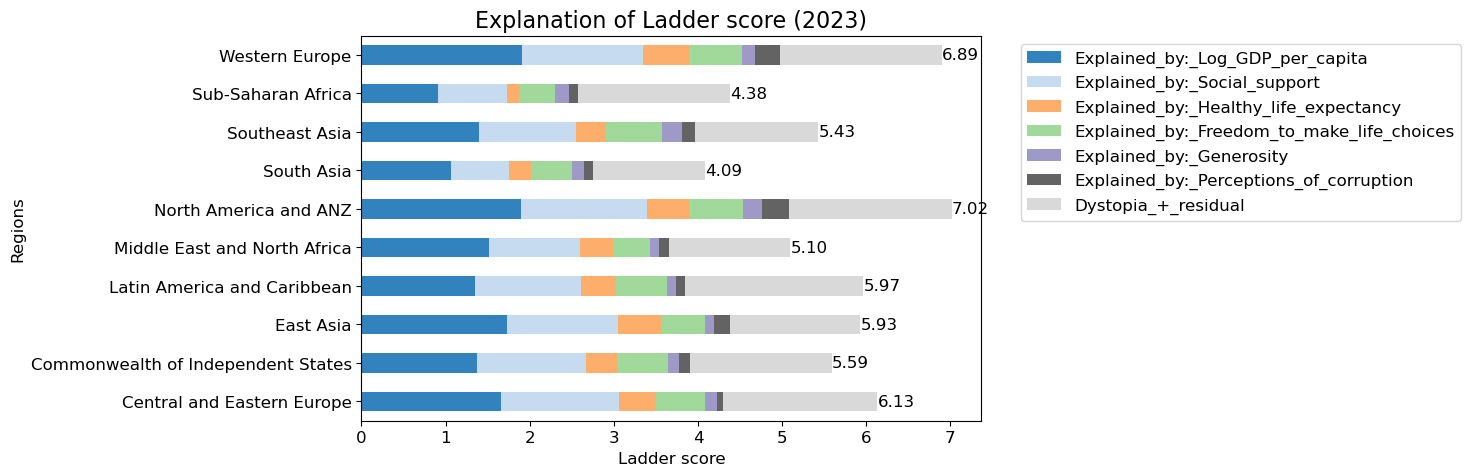

In [147]:
# create regions20 dataframe
regions20 = df20.groupby('Regional_indicator')[['Dystopia_+_residual',
                                                'Explained_by:_Log_GDP_per_capita',
                                                'Explained_by:_Social_support',
                                                'Explained_by:_Healthy_life_expectancy',
                                                'Explained_by:_Freedom_to_make_life_choices',
                                                'Explained_by:_Generosity',
                                                'Explained_by:_Perceptions_of_corruption']].mean().reset_index()
                                                
# set index of  to 'Regional_indicator'
regions20.set_index('Regional_indicator', inplace=True)
color_map = 'tab20c' # choose color palete
# Select columns for plotting
columns_to_plot20 = [
    'Explained_by:_Log_GDP_per_capita',
    'Explained_by:_Social_support',
    'Explained_by:_Healthy_life_expectancy',
    'Explained_by:_Freedom_to_make_life_choices',
    'Explained_by:_Generosity',
    'Explained_by:_Perceptions_of_corruption',
    'Dystopia_+_residual']
explanations20 = regions20[columns_to_plot20].head(11)

# Calculate the sum for each row
Sum = explanations20.sum(axis=1)
#ax = explanations20.plot(kind='barh', stacked=True, figsize=(8, 5))
ax = explanations20.plot(kind='barh', stacked=True, figsize=(8, 5), colormap=color_map)
ax.set_xlabel("Ladder score")
ax.set_ylabel("Regions")

ax.set_yticklabels(regions20.index)
plt.title('Explanation of Ladder score (2020)',fontsize=16)

for i, value in enumerate(Sum):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))  

regions23 = df23.groupby('Regional_indicator')[['Dystopia_+_residual',
                                                'Explained_by:_Log_GDP_per_capita',
                                                'Explained_by:_Social_support',
                                                'Explained_by:_Healthy_life_expectancy',
                                                'Explained_by:_Freedom_to_make_life_choices',
                                                'Explained_by:_Generosity',
                                                'Explained_by:_Perceptions_of_corruption']].mean().reset_index()
                                                
# Set the index of the DataFrame to 'Regional_indicator'
regions23.set_index('Regional_indicator', inplace=True)

# Select columns for plotting
columns_to_plot23 = [
    'Explained_by:_Log_GDP_per_capita',
    'Explained_by:_Social_support',
    'Explained_by:_Healthy_life_expectancy',
    'Explained_by:_Freedom_to_make_life_choices',
    'Explained_by:_Generosity',
    'Explained_by:_Perceptions_of_corruption',
    'Dystopia_+_residual']

# create regions23 dataframe
explanations23 = regions23[columns_to_plot23].head(11)
Sum = explanations23.sum(axis=1)
ax = explanations23.plot(kind='barh', stacked=True, figsize=(8, 5),colormap=color_map)
ax.set_xlabel("Ladder score")
ax.set_ylabel("Regions")
ax.set_yticklabels(regions23.index)
plt.title('Explanation of Ladder score (2023)',fontsize=16)

for i, value in enumerate(Sum):
    plt.text(value, i, f'{value:.2f}', ha='left', va='center')
plt.legend(loc='best', bbox_to_anchor=(1.05, 1))  # You can adjust the legend position as needed

plt.show()

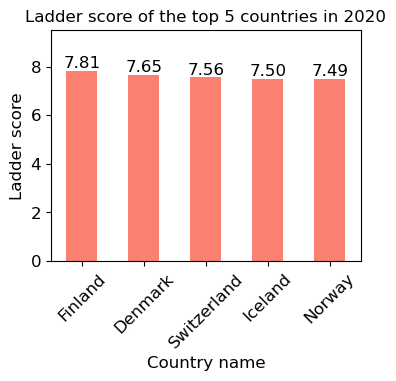

In [129]:
#Ladder score of the top 5 countries in 2020
top_5=(df20.groupby('Country_name')['Ladder_score'].max()
 .nlargest(5).plot.bar(figsize=(4, 3), color='salmon'))
plt.ylim(0,9.5) 
plt.ylabel('Ladder score')
plt.xlabel('Country name')
plt.xticks(rotation=45)
plt.title ("Ladder score of the top 5 countries in 2020",fontsize=12)
for i, v in enumerate(df20.groupby('Country_name')['Ladder_score'].max().nlargest(5)):
    top_5.text(i, v, f'{v:.2f}', ha='center', va='bottom') 

plt.show()

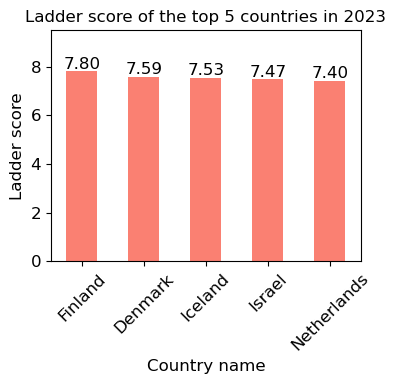

In [130]:
#Ladder score of the top 5 countries in 2023
top_5=(df23.groupby('Country_name')['Ladder_score'].max()
 .nlargest(5).plot.bar(figsize=(4, 3), color='salmon'))
plt.ylim(0,9.5) 
plt.ylabel('Ladder score')
plt.xlabel('Country name')
plt.xticks(rotation=45)
plt.title ("Ladder score of the top 5 countries in 2023",fontsize=12)
for i, v in enumerate(df23.groupby('Country_name')['Ladder_score'].max().nlargest(5)):
    top_5.text(i, v, f'{v:.2f}', ha='center', va='bottom') 
plt.show()

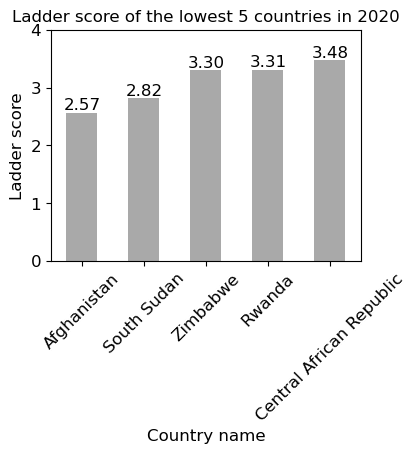

In [133]:
#chart Ladder score of the lowest 5 countries in 2020
top=(df20.groupby('Country_name')['Ladder_score'].max()
 .nsmallest(5).plot.bar(figsize=(4, 3), color='darkgray'))
plt.ylim(0,4)
plt.ylabel('Ladder score')
plt.xlabel('Country name')
plt.xticks(rotation=45)
plt.title ("Ladder score of the lowest 5 countries in 2020",fontsize=12)
for i, v in enumerate(df20.groupby('Country_name')['Ladder_score'].max().nsmallest(5)):
    top.text(i, v, f'{v:.2f}', ha='center', va='bottom')

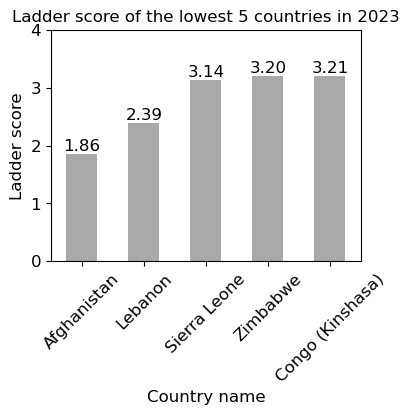

In [134]:
#chart Ladder score of the lowest 5 countries in 2023
top=(df23.groupby('Country_name')['Ladder_score'].max()
 .nsmallest(5).plot.bar(figsize=(4, 3), color='darkgray'))
plt.ylim(0,4)
plt.ylabel('Ladder score')
plt.xlabel('Country name')
plt.xticks(rotation=45)
plt.title ("Ladder score of the lowest 5 countries in 2023",fontsize=12)
for i, v in enumerate(df23.groupby('Country_name')['Ladder_score'].max().nsmallest(5)):
    top.text(i, v, f'{v:.2f}', ha='center', va='bottom')

In [135]:
#make new dataframe with neccessary columns
df23short = df23.copy()
columns_to_remove=[col for col in df23short.columns if 'Explained' in col]
df23short =df23short.drop(columns=columns_to_remove)
df23short =df23short.drop(['Ladder_score_in_Dystopia', 'Standard_error_of_ladder_score'], axis=1)
columns_to_remove1=[col for col in df23short.columns if col.endswith ('whisker')]
df23short =df23short.drop(columns=columns_to_remove1)
from IPython.display import display, HTML
html_text = '<p style="font-size: 13pt;">Correlation of factors in 2023</p>'
display(HTML(html_text))
df23short.corr(method="pearson", min_periods=20)["Ladder_score"].sort_values(ascending=False)


C:\Users\Grazina\AppData\Local\Temp\ipykernel_13412\2421847691.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df23short.corr(method="pearson", min_periods=20)["Ladder_score"].sort_values(ascending=False)


Ladder_score                    1.000000
Social_support                  0.834532
Logged_GDP_per_capita           0.784367
Healthy_life_expectancy         0.746928
Freedom_to_make_life_choices    0.662924
Dystopia_+_residual             0.494452
Generosity                      0.044082
Perceptions_of_corruption      -0.471911
Year                                 NaN
Name: Ladder_score, dtype: float64

Text(0.5, 1.02, 'Ladder score correlation with other factors in 2023')

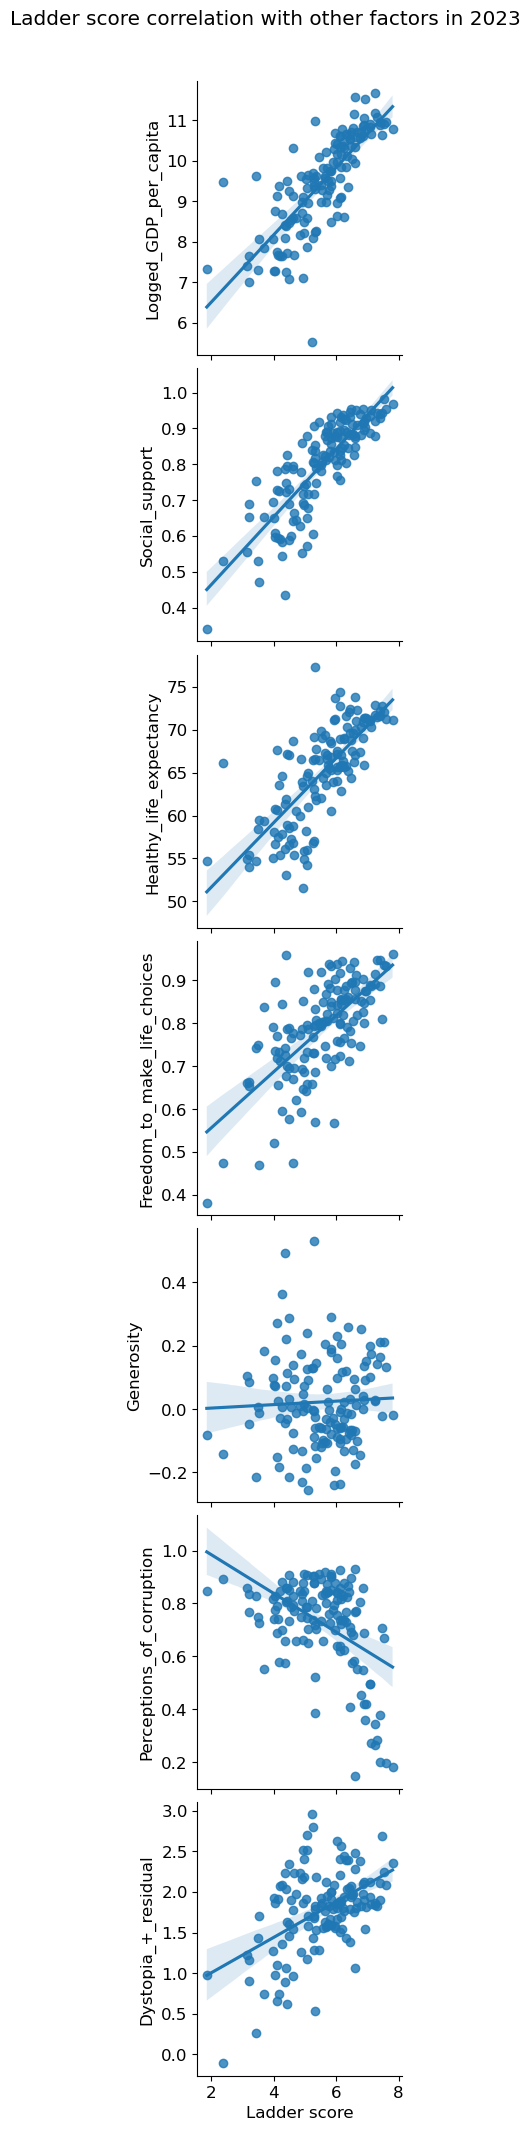

In [136]:
sns.pairplot(data=df23, kind='reg', height = 3,
                  x_vars=['Ladder_score'],
                  y_vars=['Logged_GDP_per_capita', 'Social_support','Healthy_life_expectancy', 'Freedom_to_make_life_choices','Generosity', 'Perceptions_of_corruption','Dystopia_+_residual' ])

plt.xlabel('Ladder score')
plt.suptitle('Ladder score correlation with other factors in 2023', y=1.02)


C:\Users\Grazina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\Grazina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\Grazina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\Grazina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\Grazina\anaconda3\Lib\site-packages\seaborn\axisgrid.py:1609: UserWarning: The palette list has more values (20) than needed (10), which may not be intended.
  func(x=x, y=y, **kwargs)
C:\Users\Grazina\anaconda3\Lib

Text(0.5, 1.02, 'Pairplot of  Ladder score correlations in 2023')

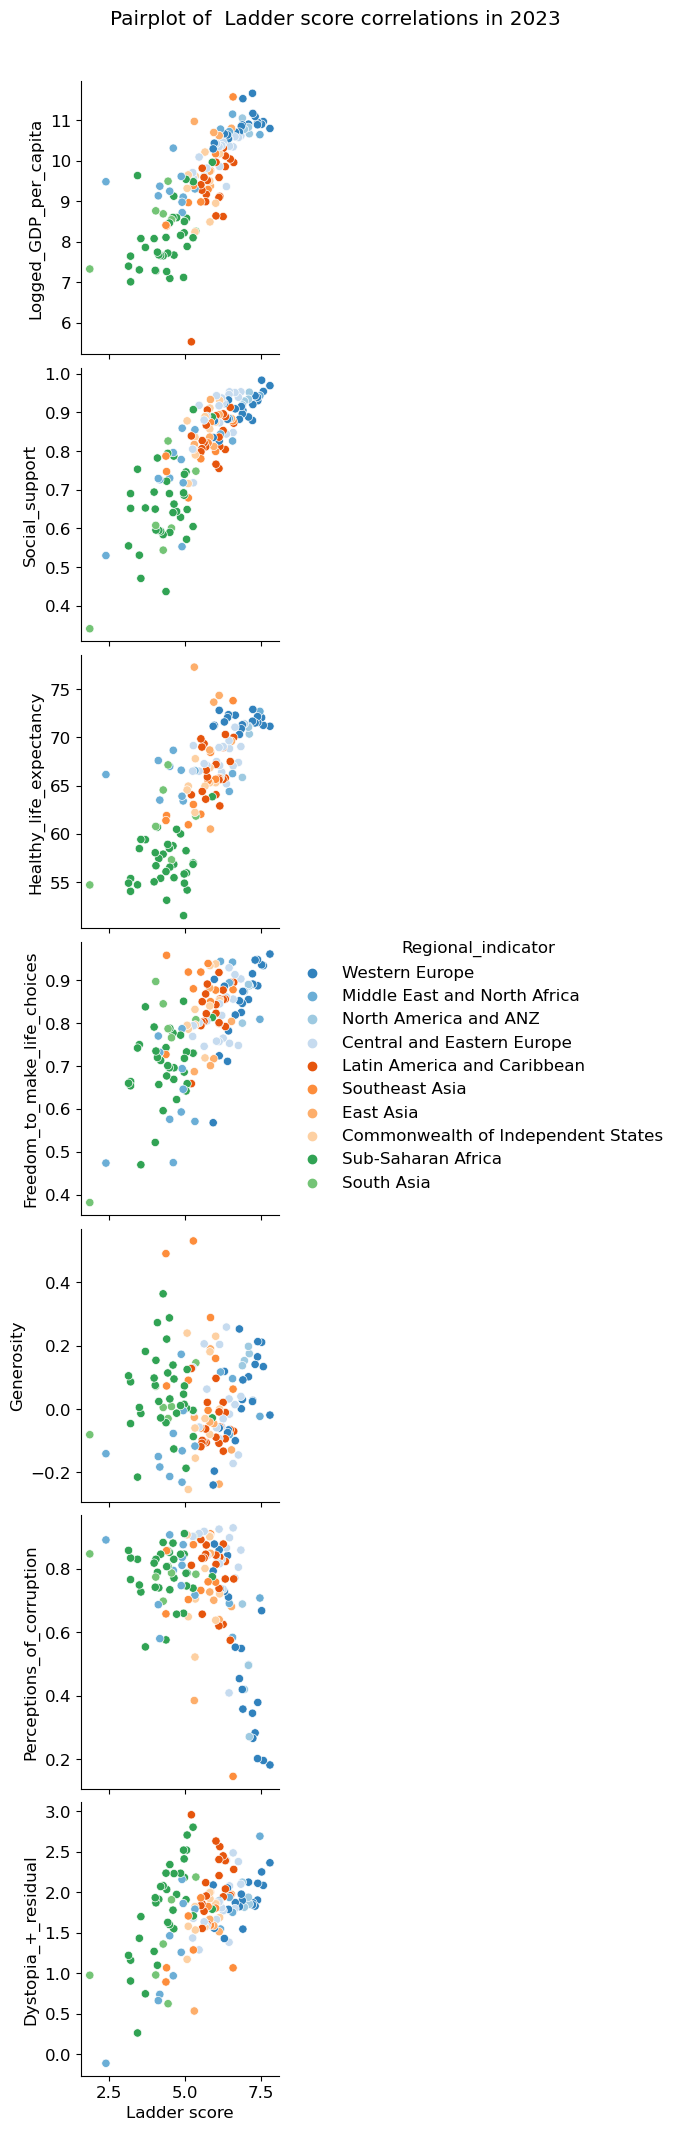

In [153]:
custom_palette = sns.color_palette("tab20c")
sns.pairplot(data=df23,  height=3,hue='Regional_indicator',
             x_vars=['Ladder_score'],
             y_vars=['Logged_GDP_per_capita', 'Social_support','Healthy_life_expectancy', 'Freedom_to_make_life_choices','Generosity', 'Perceptions_of_corruption','Dystopia_+_residual'],
            palette=custom_palette) 
plt.xlabel('Ladder score')

plt.suptitle('Pairplot of  Ladder score correlations in 2023', y=1.02)

Conclusions:

The happiness ranking are based on answers to the main life evaluation question asked in the poll. This is called the Cantril ladder: it asks respondents to think of a ladder, with the best possible life for them being a 10 and the worst possible life being a 0. They are then asked to rate their own current lives on that 0 to 10 scale. Looking at the ladder scores in 2020 and 2023, we can see that in 2023 the average Ladder score increased by 1,22 %.
The happiest region remains North America and ANZ in both 2020 and 2023, with a -2,16% decline in 2023. The largest increase of 4.33% is observed in the Commonwealth of Independent States region, while the most significant decline of -8,63% is in the South Asia region which became the most unhappiest region in 2023 with the most unhappiest country - Afghanistan. The highest Ladder score in both 2020 and 2023 is held by Finland.
In 2023 versus 2020, the Generosity factor changed the most. However, it explains only a small part of the Ladder score, and it did not have a significant impact on the overall annual Ladder score average.
According to the correlation table, we can conclude that Social support, Logged GDP per capita and Healthy life expectancy have the greatest influence on the Ladder score. The scores of these factors of the unhappiest regions, South Asia and Sub-Saharan Africa, are particularly low on the Pairplot of Ladders score correlations in 2023.